### Question: How using a safety equipment helps us to survive an accident?

We were always told: 'fasten a seat belts', 'wear helmet'. In some countries it's mandatory and not using them can cause a fine. The answer can be find in 'users' dataframe, so let's check it.

First step before any data analysis is to import required libraries and data. Any information required to understand columns is available here: https://www.kaggle.com/ahmedlahlou/accidents-in-france-from-2005-to-2016.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

users = pd.read_csv('data/users.csv', encoding='latin1')

Now let's take a look on dataframe.

In [29]:
users.head()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,201600000002,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,201600000002,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1962.0,A01


Let's see which columns contain missing values - we are interested here in two columns:
* 'grav' which is a severity of incident 
    * 1 - Unscathed
    * 2 - Killed
    * 3 - Hospitalized wounded
    * 4 - Light injury
* 'secu' which two numbers determine the safety equippment that was available for person first number stands for:
    * 1 - Belt
    * 2 - Helmet
    * 3 - Children's device
    * 4 - Reflective equipment
    * 9 - Other
    
    the second number is the use of Safety Equipment:
    * 1 - Yes
    * 2 - No
    * 3 - Not determinable

In [30]:
# Make a copy of users - in case of future extension of the notebook
users_q1 = users.copy()

Let's clean a bit 'grav' column - so we'll have descriptive names instead of numbers.

In [31]:
users_q1['grav']= users_q1['grav'].astype(str) 
users_q1['grav'] = users_q1['grav'].replace({'1': 'unscathed', '2': 'killed', '3': 'hospitalized', '4': 'light injury'})

In [32]:
users_q1.columns[users.isna().sum() != 0]

Index(['place', 'trajet', 'secu', 'locp', 'actp', 'etatp', 'an_nais'], dtype='object')

So it looks like the 'grav' does not have any missing value, but 'secu' has. What is the percentage of missing 'secu' values?

In [33]:
nans = users_q1.isna()['secu'].sum() / users.shape[0]
nans

0.02316518346166455

So it looks like only 2,3% of all users has missing values about equipment. I think we should risk removing that rows, as we can't assume what they are representing.

In [34]:
users_q1 = users_q1.dropna(subset = ['secu'], axis='rows')

Now let's work a bit on 'secu' column.

In [35]:
# Split Secu to two columns - type and if equipment was used and renaming them
users_q1.loc[:, 'equipment_used'] = users_q1.loc[:, 'secu'].values % 10

Let's visualize first diagram

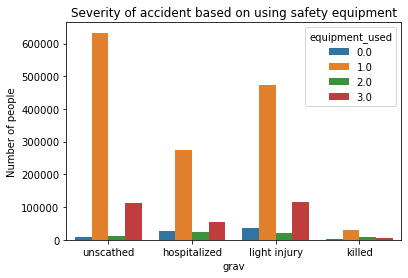

In [36]:
ax = sns.countplot(x = 'grav', hue = 'equipment_used', data=users_q1)
ax.set_title('Severity of accident based on using safety equipment')
ax.set_ylabel('Number of people')
plt.show()

Apparently, some of the digits in 'secu' are zeros. Both on two places. Based on above diagram I think it's safe to change 0 value to '11' which means 'safety belt used'. And all two digit values with 0 in the end to 1, which means that equipment was used. 

I think it's an error in the dataset - topic is already set on kaggle: https://www.kaggle.com/ahmedlahlou/accidents-in-france-from-2005-to-2016/discussion/125523.

In [37]:
users_q1['equipment_used'] = users_q1['equipment_used'].replace(0,1)
users_q1['equipment_used']= users_q1['equipment_used'].astype(int)
users_q1['equipment_used']= users_q1['equipment_used'].astype(str) 
users_q1['equipment_used'] = users_q1['equipment_used'].replace({'1': 'yes', '2': 'no', '3': 'unknown'})

In [38]:
users_q1.loc[:, 'secu'] = users_q1.loc[:, 'secu'].values // 10
users_q1['secu'] = users_q1['secu'].replace(0,1)
users_q1['grav'] = pd.Categorical(users_q1['grav'], ['unscathed', 'light injury', 'hospitalized', 'killed'])
users_q1.head()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh,equipment_used
0,201600000001,1.0,1,unscathed,2,0.0,1.0,0.0,0.0,0.0,1983.0,B02,yes
1,201600000001,1.0,1,hospitalized,1,9.0,2.0,0.0,0.0,0.0,2001.0,A01,yes
2,201600000002,1.0,1,hospitalized,1,5.0,1.0,0.0,0.0,0.0,1960.0,A01,yes
3,201600000002,2.0,2,hospitalized,1,0.0,1.0,0.0,0.0,0.0,2000.0,A01,yes
4,201600000002,3.0,2,hospitalized,2,0.0,1.0,0.0,0.0,0.0,1962.0,A01,yes


Now let's see the same diagram

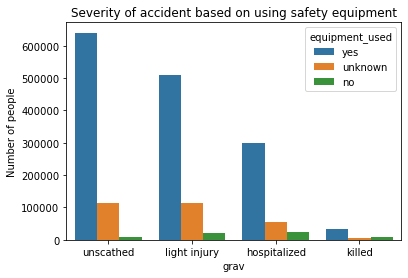

In [39]:
plt.clf()
ax = sns.countplot(x = 'grav', hue = 'equipment_used', data=users_q1.sort_values(by='grav'))
ax.set_title('Severity of accident based on using safety equipment')
ax.set_ylabel('Number of people')
plt.show()

This diagram is showing the results for all kinds of people, let's filter it out to see how it's applied to drivers and passengers.

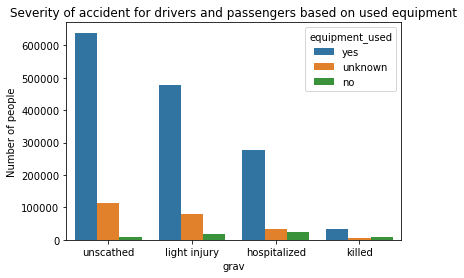

In [40]:
plt.clf()
ax = sns.countplot(x = 'grav', hue = 'equipment_used', data=users_q1[(users_q1['catu'] == 1) | (users_q1['catu'] == 2)])
ax.set_title('Severity of accident for drivers and passengers based on used safe equipment')
ax.set_ylabel('Number of people')
plt.show()

Based on this information we can tell that using safety belts helps people to survive the accident. Looking on 'no' column allows us to tell that if you won't 